# Multiple Linear Regression with Dummies - Exercise

You are given a real estate dataset. 


The data is located in the file: '50_Startups.csv'. 

You are expected to create a multiple linear regression, using the new data. 

In this exercise, the dependent variable is 'Profit', while the independent variables are 'R&D Spend', 'Administration', 'Marketing Spend', and 'State'.

#### Regarding the 'State' variable:
There are some options: 'New York', 'California', and 'Florida'. You are expected to create a dummy variable for State and include it in the regression.

Good luck!

## Import the relevant libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Importing the dataset

In [64]:
# path = r'C:\Users\user\Desktop\machine learning\class practice\Practice\50_Startups.csv'

# data = pd.read_csv(path)

# display(data)
df = pd.read_csv('50_Startups.csv')
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [65]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [66]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [67]:
df.describe()


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [69]:
df.isnull()
df.notnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
5,True,True,True,True,True
6,True,True,True,True,True
7,True,True,True,True,True
8,True,True,True,True,True
9,True,True,True,True,True


## Declare the dependent and independent variables

In [70]:
# Your code is here
x=df[['R&D Spend','Administration','Marketing Spend']]
y=df['Profit']

# print (x)

In [71]:
print(x)

    R&D Spend  Administration  Marketing Spend
0   165349.20       136897.80        471784.10
1   162597.70       151377.59        443898.53
2   153441.51       101145.55        407934.54
3   144372.41       118671.85        383199.62
4   142107.34        91391.77        366168.42
5   131876.90        99814.71        362861.36
6   134615.46       147198.87        127716.82
7   130298.13       145530.06        323876.68
8   120542.52       148718.95        311613.29
9   123334.88       108679.17        304981.62
10  101913.08       110594.11        229160.95
11  100671.96        91790.61        249744.55
12   93863.75       127320.38        249839.44
13   91992.39       135495.07        252664.93
14  119943.24       156547.42        256512.92
15  114523.61       122616.84        261776.23
16   78013.11       121597.55        264346.06
17   94657.16       145077.58        282574.31
18   91749.16       114175.79        294919.57
19   86419.70       153514.11             0.00
20   76253.86

In [72]:
print (y)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64


In [73]:
df.isnull().sum

<bound method DataFrame.sum of     R&D Spend  Administration  Marketing Spend  State  Profit
0       False           False            False  False   False
1       False           False            False  False   False
2       False           False            False  False   False
3       False           False            False  False   False
4       False           False            False  False   False
5       False           False            False  False   False
6       False           False            False  False   False
7       False           False            False  False   False
8       False           False            False  False   False
9       False           False            False  False   False
10      False           False            False  False   False
11      False           False            False  False   False
12      False           False            False  False   False
13      False           False            False  False   False
14      False           False          

## Create a dummy variable for 'State'

In [74]:

# Your code is here
# dt is a variable for data transformation from string to integers 
dt= LabelEncoder()

df['State'] = dt.fit_transform(df['State'])




In [75]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [76]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,2,64926.08
46,1315.46,115816.21,297114.46,1,49490.75
47,0.00,135426.92,0.00,0,42559.73
48,542.05,51743.15,0.00,2,35673.41
49,0.00,116983.80,45173.06,0,14681.40


## To put Dataset On Same Scale

In [77]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


X = df.drop('State', axis=1) 
y = df['Profit']  


scaler = StandardScaler()


X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


print("Scaled Features:\n", X_scaled_df.head())


Scaled Features:
    R&D Spend  Administration  Marketing Spend    Profit
0   2.016411        0.560753         2.153943  2.011203
1   1.955860        1.082807         1.923600  1.999430
2   1.754364       -0.728257         1.626528  1.980842
3   1.554784       -0.096365         1.422210  1.776627
4   1.504937       -1.079919         1.281528  1.357740


## Splitting the dataset into the Training set and Test set

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [79]:
ss = StandardScaler()

In [93]:
x_train[['R&D Spend','Administration','Marketing Spend']] = \
ss.fit_transform(x_train[['R&D Spend','Administration','Marketing Spend']])

x_test[['R&D Spend','Administration','Marketing Spend']] = \
ss.transform(x_test[['R&D Spend','Administration','Marketing Spend']])

In [94]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set size (X_train):", X_train.shape)
print("Test set size (X_test):", X_test.shape)

Training set size (X_train): (40, 4)
Test set size (X_test): (10, 4)


In [99]:
import statsmodels.api as sm
# x_train = sm.add_constant(x_train)
# x_test = sm.add_constant(x_test)
# results = sm.OLS(y_train,x_train).fit()
# results.summary()
# Ensure the indices of x_train and y_train are aligned
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

x_train = x_train.loc[y_train.index]  # Align x_train with y_train's index

x_train = sm.add_constant(x_train)
results = sm.OLS(y_train, x_train).fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.5078
Date:                Wed, 04 Dec 2024   Prob (F-statistic):              0.679
Time:                        15:00:44   Log-Likelihood:                -481.26
No. Observations:                  40   AIC:                             970.5
Df Residuals:                      36   BIC:                             977.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.157e+05   6773.260     

In [100]:
y_pred = results.predict(x_test)
y_pred

27    101643.184099
35    122209.739283
40    114252.349332
38    125689.609358
2     113894.415769
3     110384.066353
48    142915.584508
29    115595.283190
46    100815.957403
31    116760.481632
dtype: float64

In [101]:
y_test


13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
Name: Profit, dtype: float64

## Create the regression

In [85]:
from sklearn.metrics import mean_squared_error

### Training the Multiple Linear Regression model on the Training set

In [102]:
mse =  mean_squared_error(y_test,y_pred)
mse

1387248630.8027494

In [105]:
df[['R&D Spend', 'Profit']].corr()

,R&D Spend,Profit
R&D Spend,1.0000,0.9729
Profit,0.9729,1.0000


### Predicting the Test set results

In [106]:
# Your code is here

from scipy import stats

### Calculate the Mean Squared Error

In [89]:
# Your code is here
from sklearn.metrics import mean_squared_error


In [108]:
per_coef, p_value = stats.pearsonr(df['R&D Spend'], df['Profit'])

print(per_coef)
print(p_value)

0.9729004656594832
3.500322243690601e-32


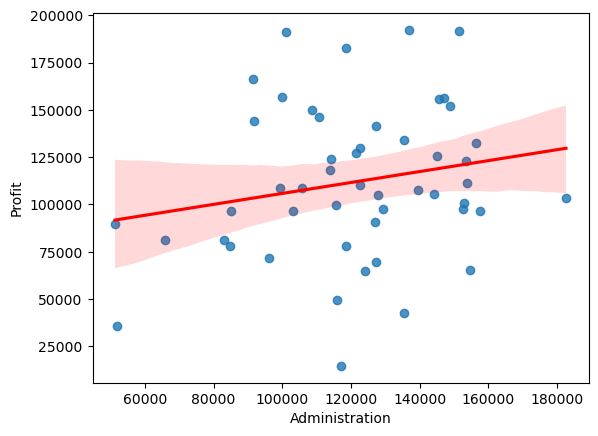

In [115]:
sns.regplot(x="Administration",y='Profit', data=df, line_kws={'color':'red'})
plot.show()